In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from pathlib import Path


In [5]:
WTH_df.head()

World trade World trade.1  Unnamed: 2  \
0          NaN           NaN         NaN   
1          NaN   Final index         NaN   
2          NaN    (1913=100)         NaN   
3          NaN      Exports          NaN   
4          NaN   World trade         NaN   

                                       Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                                     Full sample        NaN        NaN   
1                                             NaN        NaN        NaN   
2  Current prices, current borders (Millons US $)        NaN        NaN   
3                                         Imports        NaN        NaN   
4                                          Africa    America       Asia   

  Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  ... Unnamed: 107 Unnamed: 108  \
0        NaN        NaN        NaN         NaN  ...          NaN          NaN   
1        NaN        NaN        NaN         NaN  ...          NaN          NaN   
2        NaN        NaN        NaN         NaN  ...          NaN          NaN   
3        NaN        NaN        NaN         NaN  ...          NaN          NaN   
4     Europe    Oceania      World         NaN  ...       Europe      Oceania   

  Unnamed: 109 Unnamed: 110     Unnamed: 111 Unnamed: 112  Unnamed: 113  \
0          NaN          NaN      1850 sample          NaN           NaN   
1          NaN          NaN              NaN          NaN           NaN   
2          NaN          NaN  Number polities          NaN           NaN   
3          NaN          NaN          Exports          NaN           NaN   
4        World          NaN           Africa      America          Asia   

  Unnamed: 114 Unnamed: 115 Unnamed: 116  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4       Europe      Oceania        World  

[5 rows x 117 columns]

In [6]:
df = pd.read_csv("datasets\Dyadic_COW_4.0.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Magnus\AppData\Local\Temp\ipykernel_35016\2554678162.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("datasets\Dyadic_COW_4.0.csv")


In [11]:
df.head()

ccode1  ccode2  year                 importer1 importer2      flow1  \
0       2      20  1920  United States of America    Canada  611.85999   
1       2      20  1921  United States of America    Canada  335.44000   
2       2      20  1922  United States of America    Canada  364.01999   
3       2      20  1923  United States of America    Canada  416.00000   
4       2      20  1924  United States of America    Canada  399.14001   

       flow2  smoothflow1  smoothflow2  smoothtotrade  ...  dip2  trdspike  \
0  735.47998    611.85999    735.47998     1347.34000  ...     0         0   
1  442.98999    335.44000    442.98999      778.42999  ...     0         0   
2  502.84000    364.01999    502.84000      866.85999  ...     0         0   
3  598.14001    416.00000    598.14001     1014.14000  ...     0         0   
4  496.32001    399.14001    496.32001      895.46002  ...     0         0   

   tradedip  bel_lux_alt_flow1  bel_lux_alt_flow2  china_alt_flow1  \
0         0               -9.0               -9.0             -9.0   
1         0               -9.0               -9.0             -9.0   
2         0               -9.0               -9.0             -9.0   
3         0               -9.0               -9.0             -9.0   
4         0               -9.0               -9.0             -9.0   

   china_alt_flow2  source1  source2  version  
0             -9.0      1.0      1.0        4  
1             -9.0      1.0      1.0        4  
2             -9.0      1.0      1.0        4  
3             -9.0      1.0      1.0        4  
4             -9.0      1.0      1.0        4  

[5 rows x 23 columns]

In [20]:
df[df["ccode2"] == 2]

Empty DataFrame
Columns: [ccode1, ccode2, year, importer1, importer2, flow1, flow2, smoothflow1, smoothflow2, smoothtotrade, spike1, spike2, dip1, dip2, trdspike, tradedip, bel_lux_alt_flow1, bel_lux_alt_flow2, china_alt_flow1, china_alt_flow2, source1, source2, version]
Index: []

[0 rows x 23 columns]

In [19]:
df[df["ccode2"] == 2].groupby("year")["flow2"]

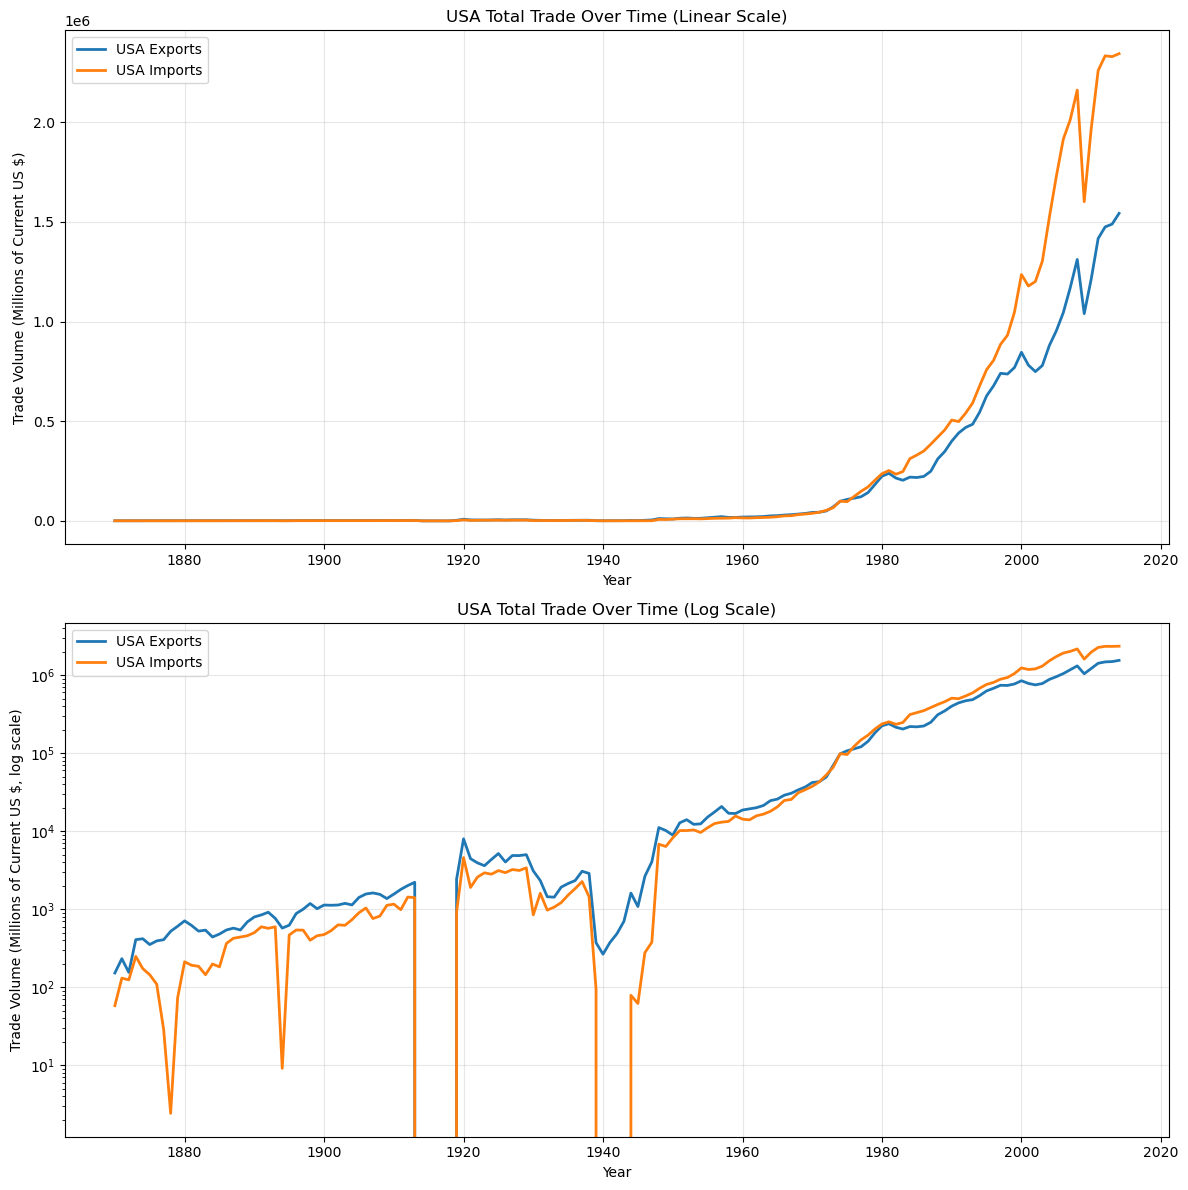


Trade Statistics (in millions of current US $):
Latest year: 2014
Latest exports: 1,542,839.83
Latest imports: 2,343,923.52
Trade balance: -801,083.69


In [22]:
def plot_usa_trade():
    # USA's imports: sum of flow1 when USA is ccode1 and flow2 when USA is ccode2
    usa_imports_as_ccode1 = df[df['ccode1'] == 2].groupby('year')['flow1'].sum()
    usa_imports_as_ccode2 = df[df['ccode2'] == 2].groupby('year')['flow2'].sum()
    usa_total_imports = usa_imports_as_ccode1.add(usa_imports_as_ccode2, fill_value=0)

    # USA's exports: sum of flow2 when USA is ccode1 and flow1 when USA is ccode2
    usa_exports_as_ccode1 = df[df['ccode1'] == 2].groupby('year')['flow2'].sum()
    usa_exports_as_ccode2 = df[df['ccode2'] == 2].groupby('year')['flow1'].sum()
    usa_total_exports = usa_exports_as_ccode1.add(usa_exports_as_ccode2, fill_value=0)

    # Create figure with two subplots: linear and log scale
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Linear scale plot
    ax1.plot(usa_total_exports.index, usa_total_exports.values, label='USA Exports', linewidth=2)
    ax1.plot(usa_total_imports.index, usa_total_imports.values, label='USA Imports', linewidth=2)
    ax1.set_title('USA Total Trade Over Time (Linear Scale)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Trade Volume (Millions of Current US $)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Log scale plot
    ax2.plot(usa_total_exports.index, usa_total_exports.values, label='USA Exports', linewidth=2)
    ax2.plot(usa_total_imports.index, usa_total_imports.values, label='USA Imports', linewidth=2)
    ax2.set_yscale('log')
    ax2.set_title('USA Total Trade Over Time (Log Scale)')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Trade Volume (Millions of Current US $, log scale)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Print some statistics
    print("\nTrade Statistics (in millions of current US $):")
    print(f"Latest year: {usa_total_exports.index[-1]}")
    print(f"Latest exports: {usa_total_exports.values[-1]:,.2f}")
    print(f"Latest imports: {usa_total_imports.values[-1]:,.2f}")
    print(f"Trade balance: {(usa_total_exports.values[-1] - usa_total_imports.values[-1]):,.2f}")

plot_usa_trade()

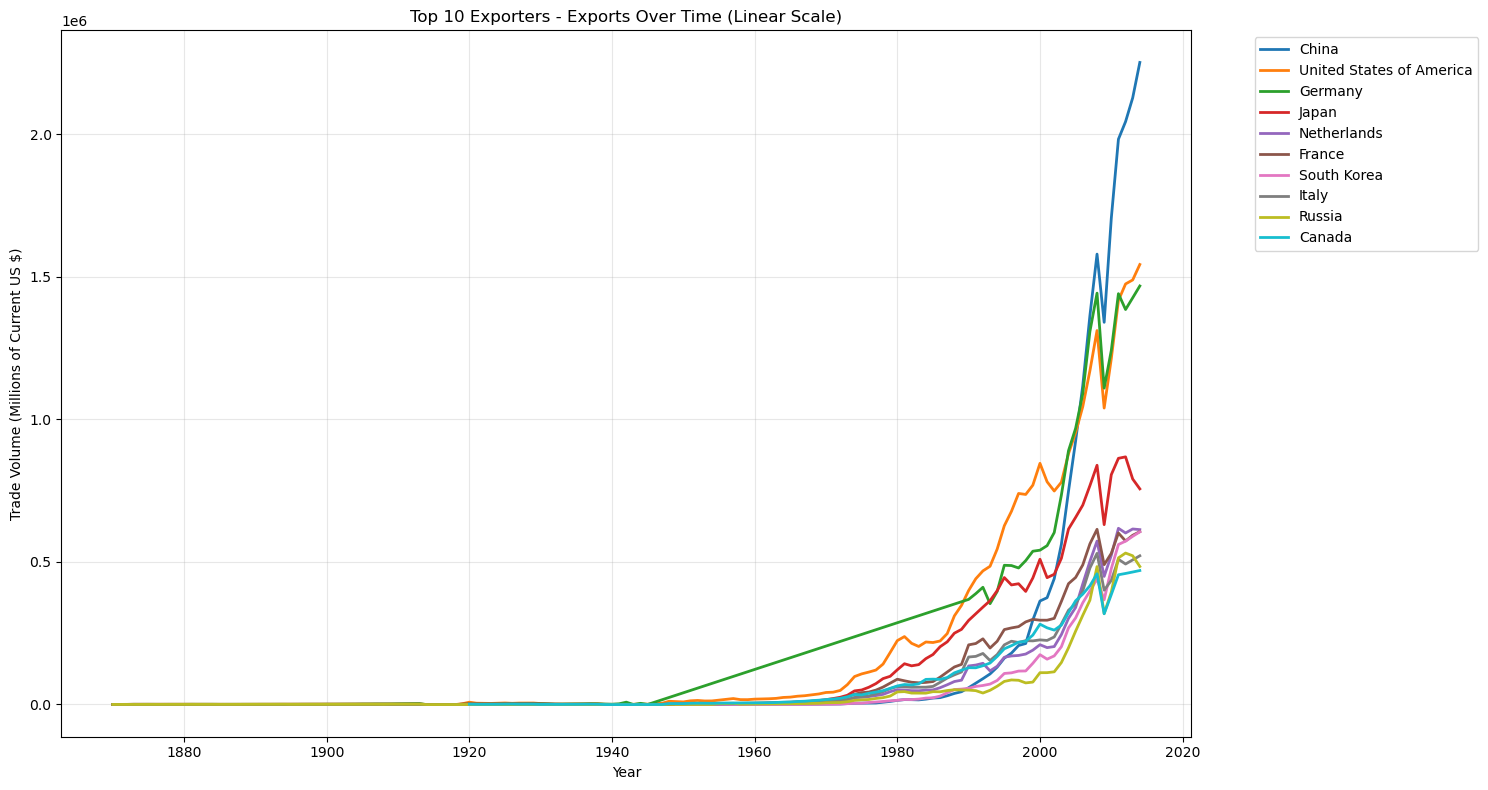

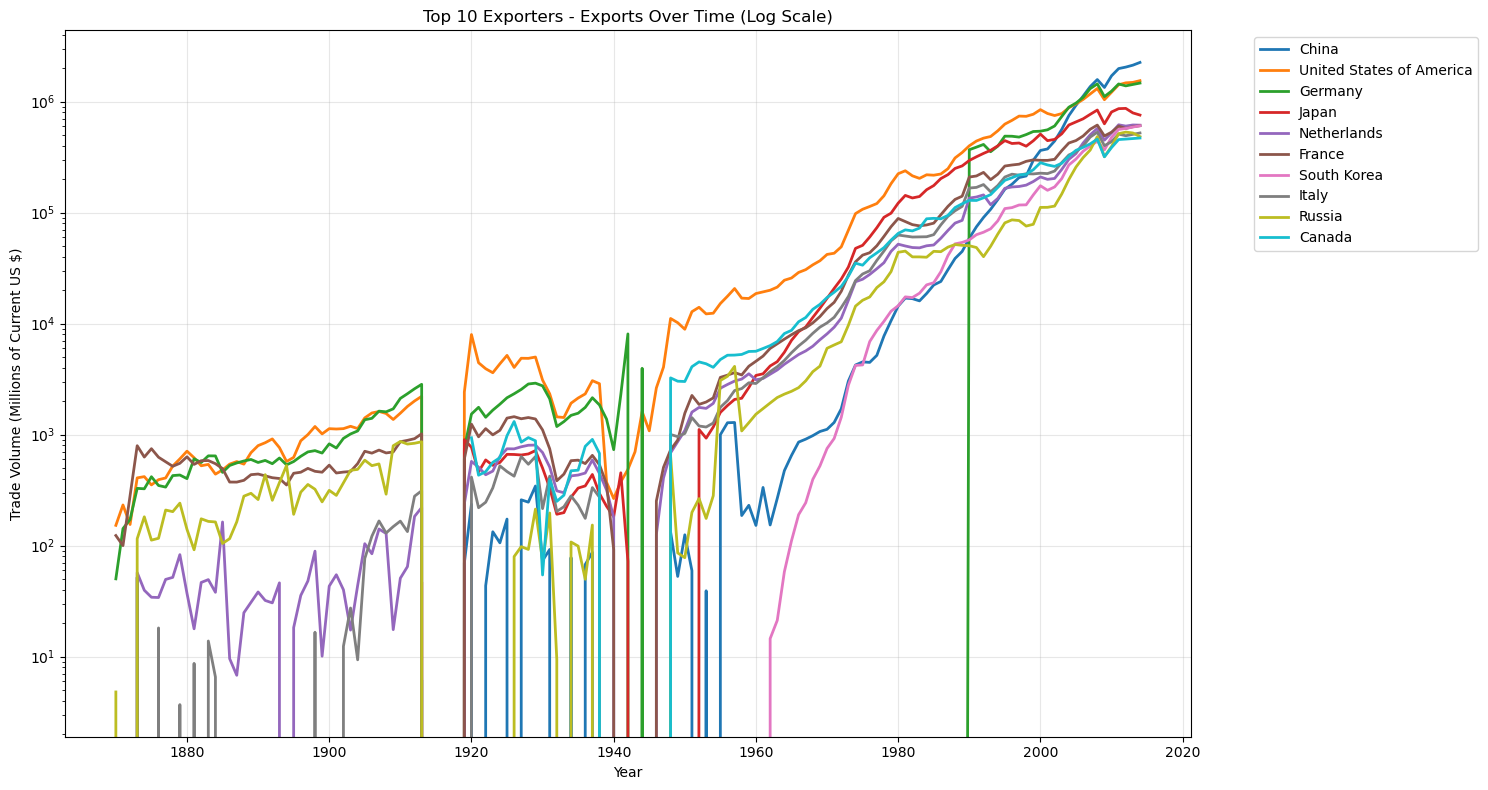

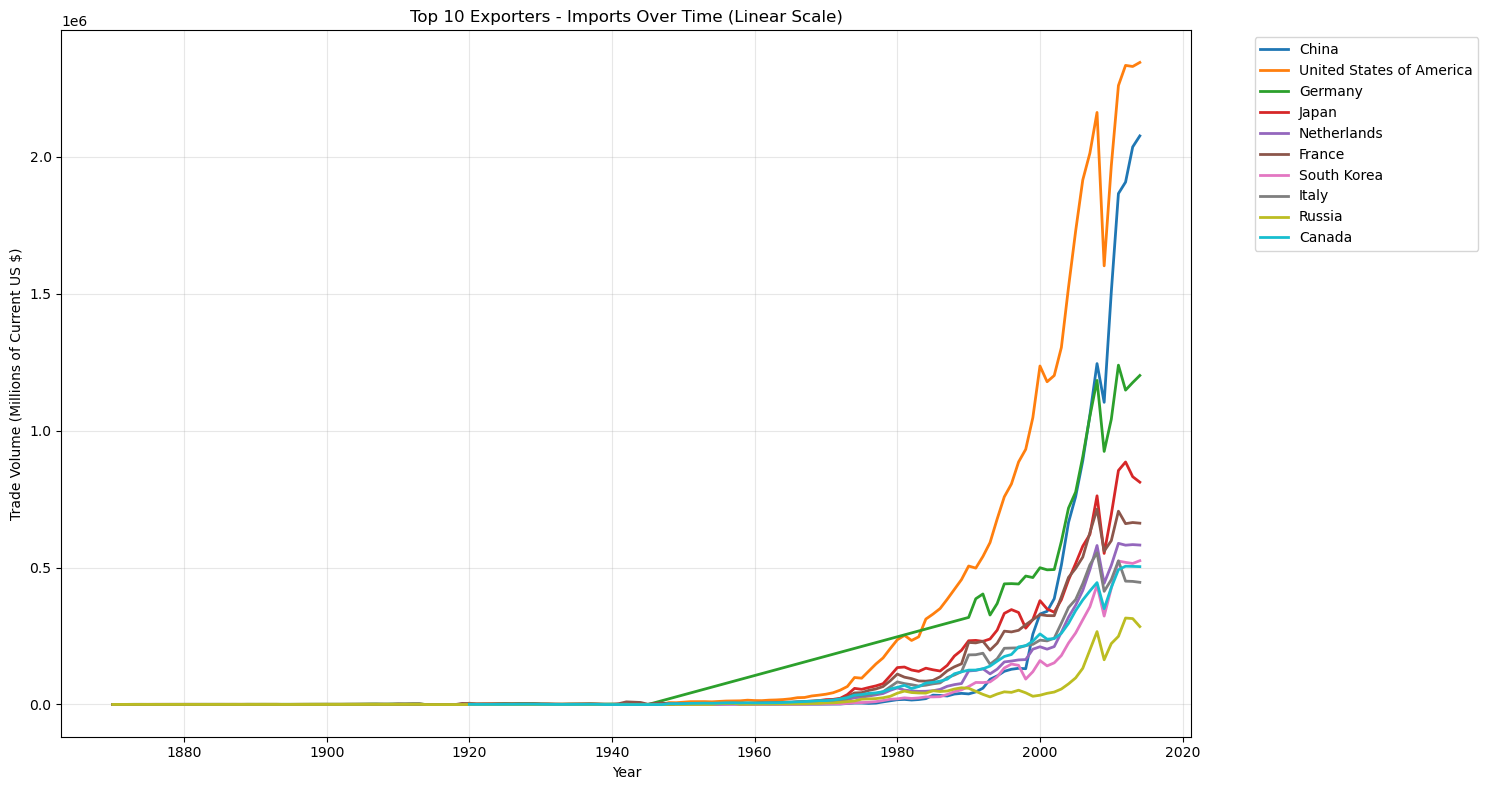

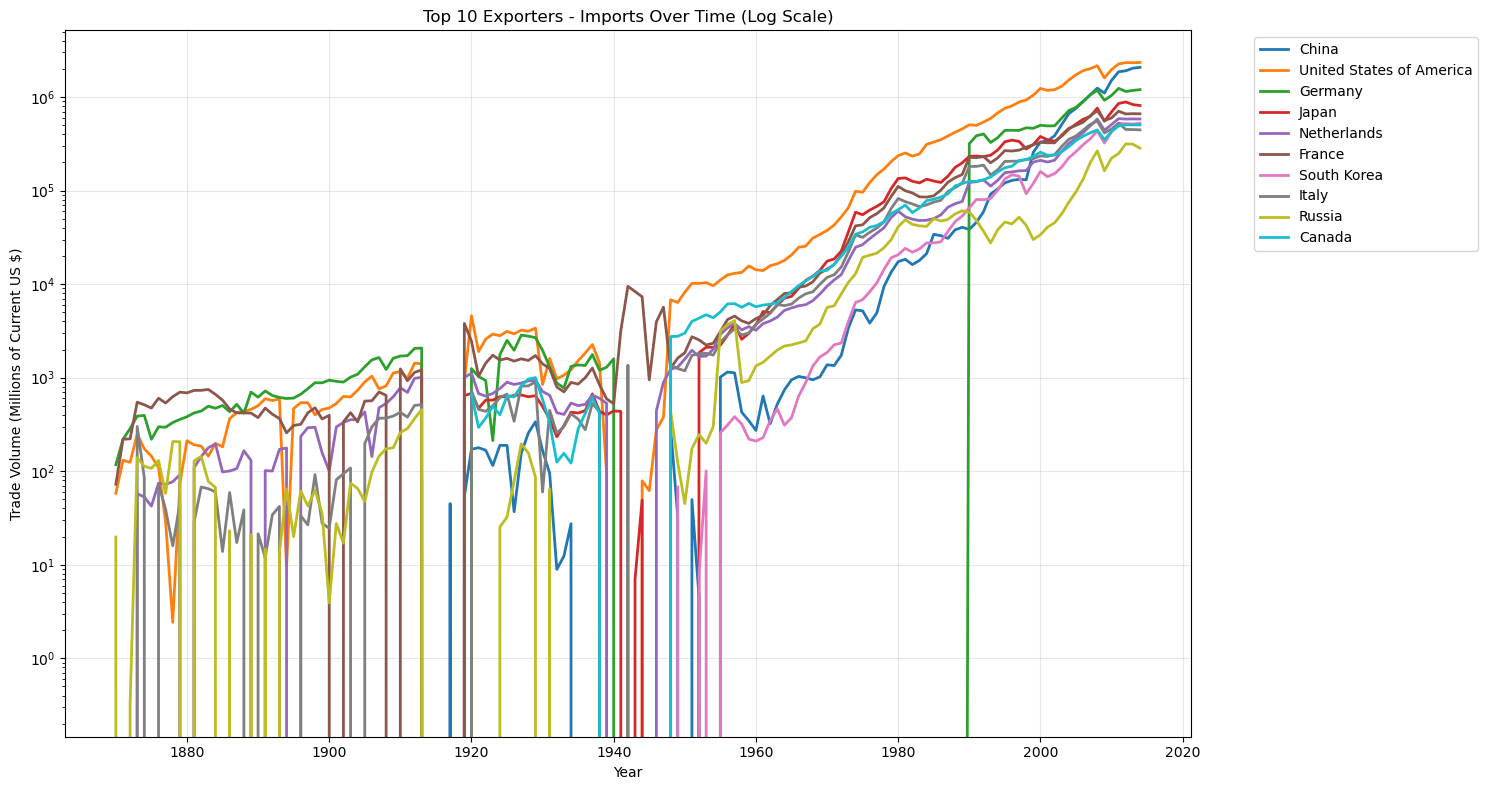


Top 10 Exporters Statistics (in millions of current US $):

China:
Exports: 2,251,450.55
Imports: 2,075,764.44
Trade balance: 175,686.11

United States of America:
Exports: 1,542,839.83
Imports: 2,343,923.52
Trade balance: -801,083.69

Germany:
Exports: 1,467,588.47
Imports: 1,201,044.86
Trade balance: 266,543.61

Japan:
Exports: 756,027.60
Imports: 811,524.97
Trade balance: -55,497.37

Netherlands:
Exports: 613,115.73
Imports: 581,950.83
Trade balance: 31,164.90

France:
Exports: 605,968.54
Imports: 661,824.41
Trade balance: -55,855.86

South Korea:
Exports: 605,277.98
Imports: 524,757.17
Trade balance: 80,520.81

Italy:
Exports: 521,335.24
Imports: 445,933.43
Trade balance: 75,401.81

Russia:
Exports: 483,850.82
Imports: 284,293.19
Trade balance: 199,557.63

Canada:
Exports: 469,699.34
Imports: 503,206.35
Trade balance: -33,507.01


C:\Users\Magnus\AppData\Local\Temp\ipykernel_35016\538580332.py:93: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imports_as_ccode1 = df[df["year"] == latest_year][df["ccode1"] == code]["flow1"].sum()
C:\Users\Magnus\AppData\Local\Temp\ipykernel_35016\538580332.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imports_as_ccode2 = df[df["year"] == latest_year][df["ccode2"] == code]["flow2"].sum()
C:\Users\Magnus\AppData\Local\Temp\ipykernel_35016\538580332.py:93: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imports_as_ccode1 = df[df["year"] == latest_year][df["ccode1"] == code]["flow1"].sum()
C:\Users\Magnus\AppData\Local\Temp\ipykernel_35016\538580332.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imports_as_ccode2 = df[df["year"] == latest_year][df["ccode2"] == code]["flow2"].sum()
C:\Users\Magnus\AppData\Local\Temp\ipykernel_35016\538580332.py:93: 

In [27]:
def plot_top_exporters():
    # Get the latest year in the dataset
    latest_year = df["year"].max()

    # Calculate total exports for each country in the latest year
    # For each country, sum both their exports as ccode1 (flow2) and as ccode2 (flow1)
    latest_exports_as_ccode1 = df[df["year"] == latest_year].groupby("ccode1")["flow2"].sum()
    latest_exports_as_ccode2 = df[df["year"] == latest_year].groupby("ccode2")["flow1"].sum()
    latest_total_exports = latest_exports_as_ccode1.add(latest_exports_as_ccode2, fill_value=0)
    
    # Get country names for the codes
    country_names = {}
    for code in latest_total_exports.index:
        # Get name from either importer1 or importer2 where the code matches
        name = df[df["ccode1"] == code]["importer1"].iloc[0] if len(df[df["ccode1"] == code]) > 0 else df[df["ccode2"] == code]["importer2"].iloc[0]
        country_names[code] = name

    # Get top 10 exporters by code
    top_10_exporter_codes = latest_total_exports.nlargest(10).index

    # Create four separate figures
    plt.figure(figsize=(15,8))
    # Plot exports linear scale
    for code in top_10_exporter_codes:
        exports_as_ccode1 = df[df["ccode1"] == code].groupby("year")["flow2"].sum()
        exports_as_ccode2 = df[df["ccode2"] == code].groupby("year")["flow1"].sum()
        total_exports = exports_as_ccode1.add(exports_as_ccode2, fill_value=0)
        plt.plot(total_exports.index, total_exports.values, label=country_names[code], linewidth=2)
    
    plt.title("Top 10 Exporters - Exports Over Time (Linear Scale)")
    plt.xlabel("Year")
    plt.ylabel("Trade Volume (Millions of Current US $)")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15,8))
    # Plot exports log scale
    for code in top_10_exporter_codes:
        exports_as_ccode1 = df[df["ccode1"] == code].groupby("year")["flow2"].sum()
        exports_as_ccode2 = df[df["ccode2"] == code].groupby("year")["flow1"].sum()
        total_exports = exports_as_ccode1.add(exports_as_ccode2, fill_value=0)
        plt.plot(total_exports.index, total_exports.values, label=country_names[code], linewidth=2)
    
    plt.yscale('log')
    plt.title("Top 10 Exporters - Exports Over Time (Log Scale)")
    plt.xlabel("Year")
    plt.ylabel("Trade Volume (Millions of Current US $)")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15,8))
    # Plot imports linear scale
    for code in top_10_exporter_codes:
        imports_as_ccode1 = df[df["ccode1"] == code].groupby("year")["flow1"].sum()
        imports_as_ccode2 = df[df["ccode2"] == code].groupby("year")["flow2"].sum()
        total_imports = imports_as_ccode1.add(imports_as_ccode2, fill_value=0)
        plt.plot(total_imports.index, total_imports.values, label=country_names[code], linewidth=2)
    
    plt.title("Top 10 Exporters - Imports Over Time (Linear Scale)")
    plt.xlabel("Year")
    plt.ylabel("Trade Volume (Millions of Current US $)")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15,8))
    # Plot imports log scale
    for code in top_10_exporter_codes:
        imports_as_ccode1 = df[df["ccode1"] == code].groupby("year")["flow1"].sum()
        imports_as_ccode2 = df[df["ccode2"] == code].groupby("year")["flow2"].sum()
        total_imports = imports_as_ccode1.add(imports_as_ccode2, fill_value=0)
        plt.plot(total_imports.index, total_imports.values, label=country_names[code], linewidth=2)
    
    plt.yscale('log')
    plt.title("Top 10 Exporters - Imports Over Time (Log Scale)")
    plt.xlabel("Year")
    plt.ylabel("Trade Volume (Millions of Current US $)")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print statistics for top exporters
    print("\nTop 10 Exporters Statistics (in millions of current US $):")
    for code in top_10_exporter_codes:
        name = country_names[code]
        exports = latest_total_exports[code]
        imports_as_ccode1 = df[df["year"] == latest_year][df["ccode1"] == code]["flow1"].sum()
        imports_as_ccode2 = df[df["year"] == latest_year][df["ccode2"] == code]["flow2"].sum()
        total_imports = imports_as_ccode1 + imports_as_ccode2
        print(f"\n{name}:")
        print(f"Exports: {exports:,.2f}")
        print(f"Imports: {total_imports:,.2f}")
        print(f"Trade balance: {exports - total_imports:,.2f}")
plot_top_exporters()

In [ ]:
def plot_trade_network(year = 1920):
    # Filter data for 1920
    df = df[df["year"] == year]

    # Create directed graph
    G = nx.DiGraph()

    # Add edges with weights
    for _, row in df.iterrows():
        if row["flow1"] > 0:  # Only add significant trade flows
            G.add_edge(
                row["importer1"], row["importer2"], weight=row["flow1"] / 1000
            )  # Scale down weights for better visualization

    # Calculate node sizes based on total trade volume
    node_sizes = []
    for node in G.nodes():
        total_trade = sum(
            [G[node][neighbor]["weight"] for neighbor in G.neighbors(node)]
        )
        node_sizes.append(total_trade)

    # Normalize node sizes
    node_sizes = np.array(node_sizes)
    node_sizes = (
        1000
        + (node_sizes - node_sizes.min()) / (node_sizes.max() - node_sizes.min()) * 9000
    )

    # Create the plot
    plt.figure(figsize=(15, 15))

    # Use spring layout for better visualization
    pos = nx.spring_layout(G, k=1, iterations=50)

    # Draw the network
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.2, arrows=True, arrowsize=10)
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title("Global Trade Network - " + str(year))
    plt.axis("off")

    # Save the plot
    # plt.savefig("_visualizations/trade_network_1920.png", dpi=300, bbox_inches="tight")
    # plt.close()
    plt.show()



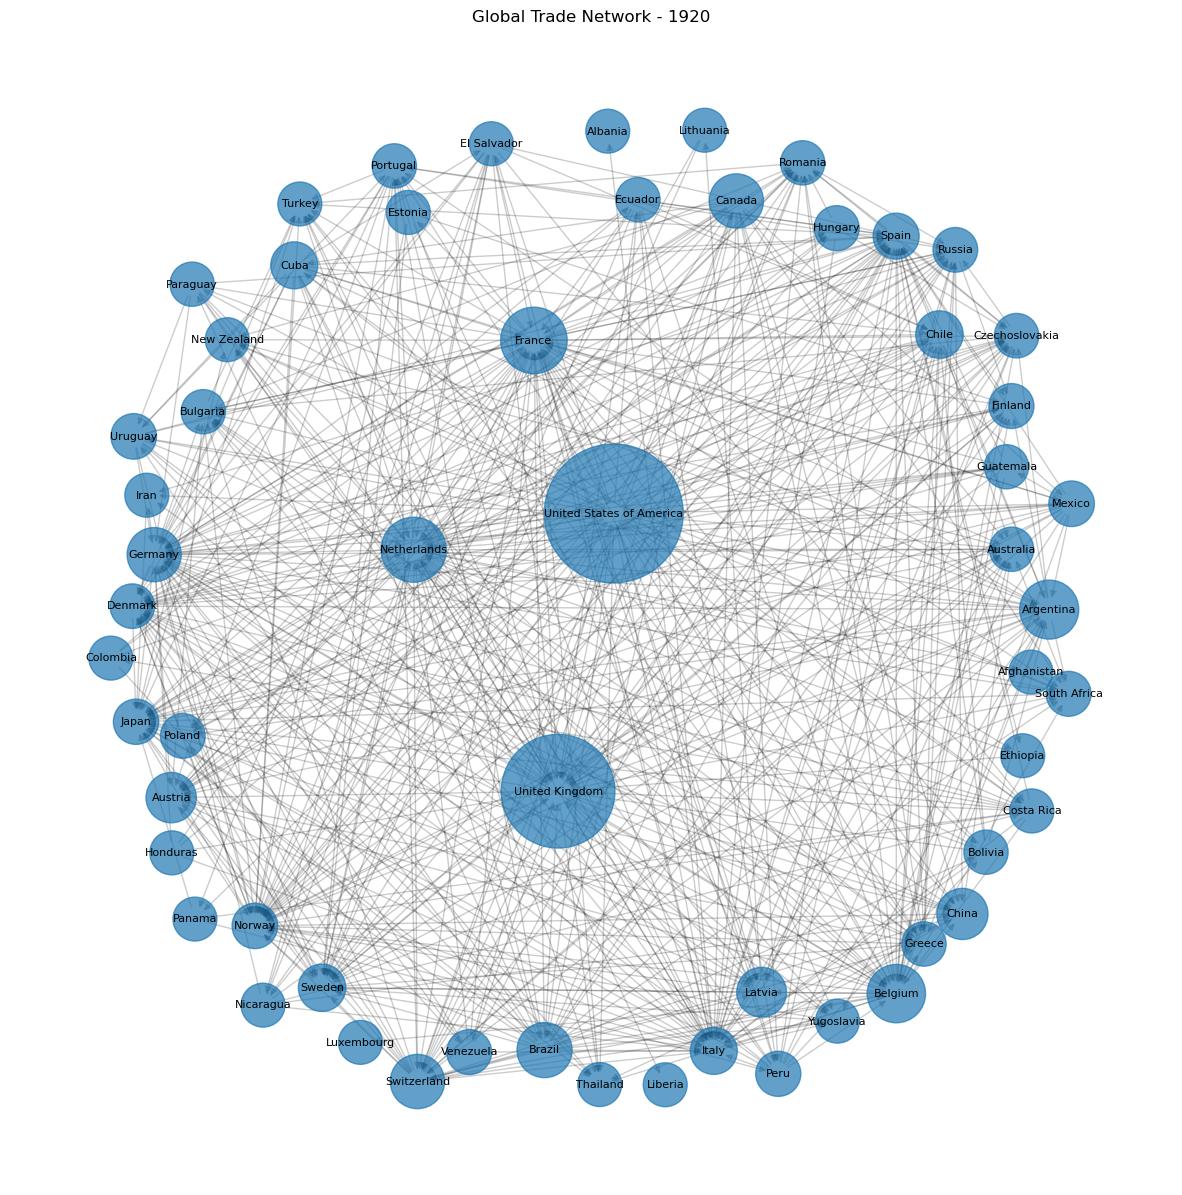

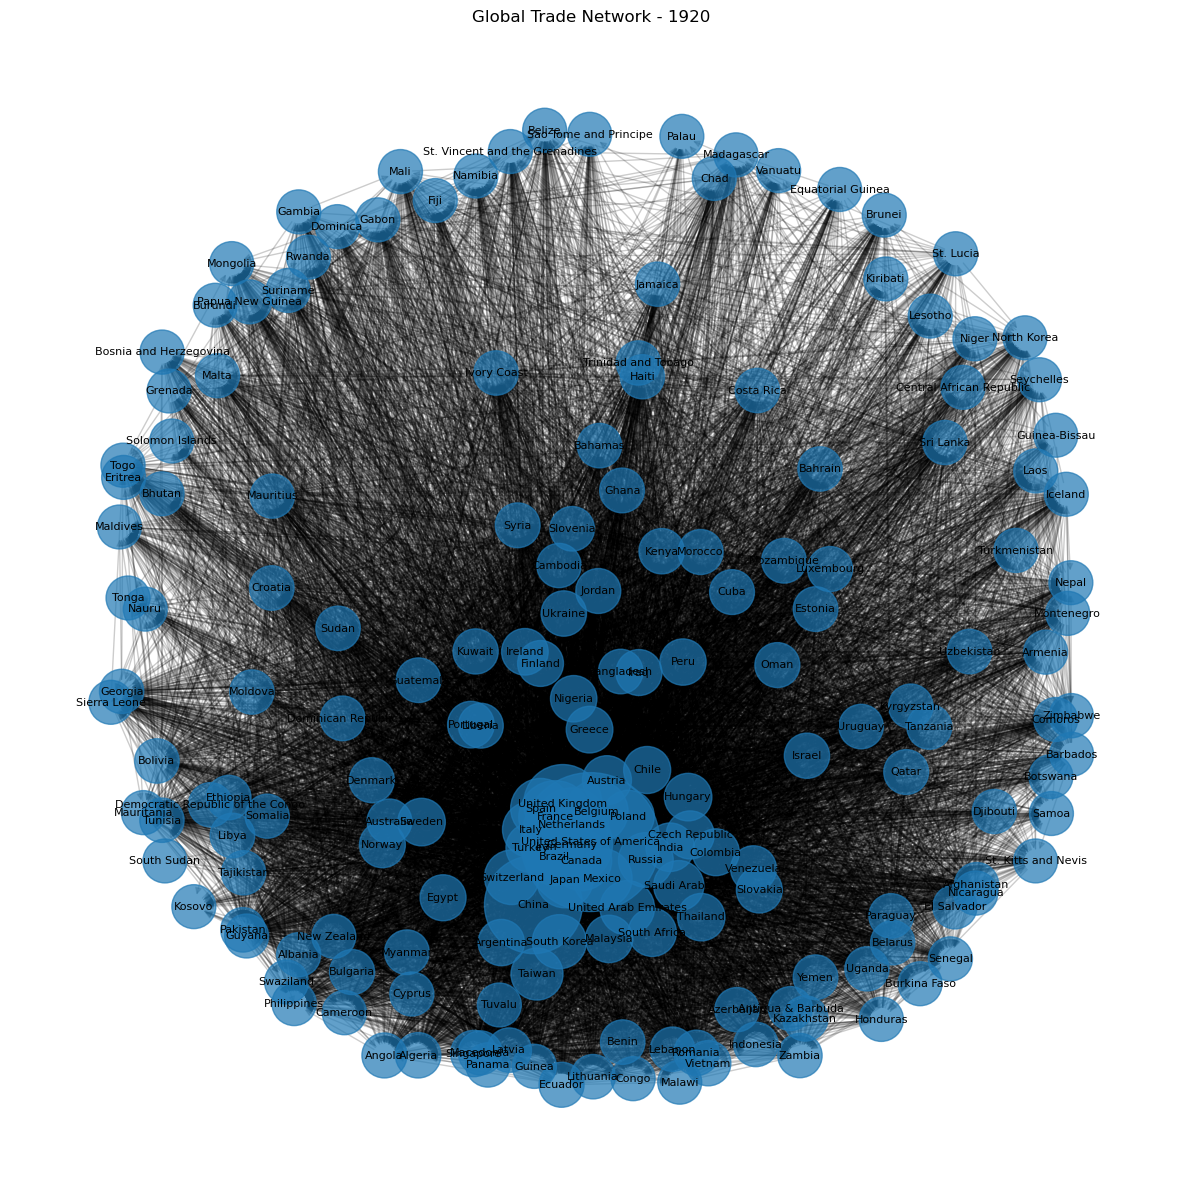

In [29]:
plot_trade_network(1920)
plot_trade_network(2014)

In [33]:
import wbdata
indicators = {'NY.GDP.MKTP.KD': 'GDP'}
    
    # Get data for USA
data = wbdata.get_dataframe(indicators, country=['USA'])

In [34]:
data

GDP
date              
2023  2.206258e+13
2022  2.144339e+13
2021  2.091785e+13
2020  1.972358e+13
2019  2.015964e+13
...            ...
1964  4.113637e+12
1963  3.888125e+12
1962  3.724258e+12
1961  3.510139e+12
1960  3.431221e+12

[64 rows x 1 columns]

In [41]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def load_and_process_gdp():
    # World Bank indicator for GDP (constant 2015 US$)
    indicators = {'NY.GDP.MKTP.KD': 'GDP'}
    
    # Get data for USA
    data = wbdata.get_dataframe(indicators, country=['USA'])
    
    # Clean and process the data
    gdp_data = data.reset_index()
    gdp_data['year'] = pd.to_datetime(gdp_data['date']).dt.year
    gdp_data = gdp_data.set_index('year')['GDP']
    
    # Convert to millions to match trade data
    gdp_data = gdp_data / 1e6
    
    return gdp_data



Statistics for 2014:
GDP: $17,771,549.06 million
Total Trade: $3,886,763.35 million
Trade as % of GDP: 21.87%
Exports as % of GDP: 8.68%
Imports as % of GDP: 13.19%


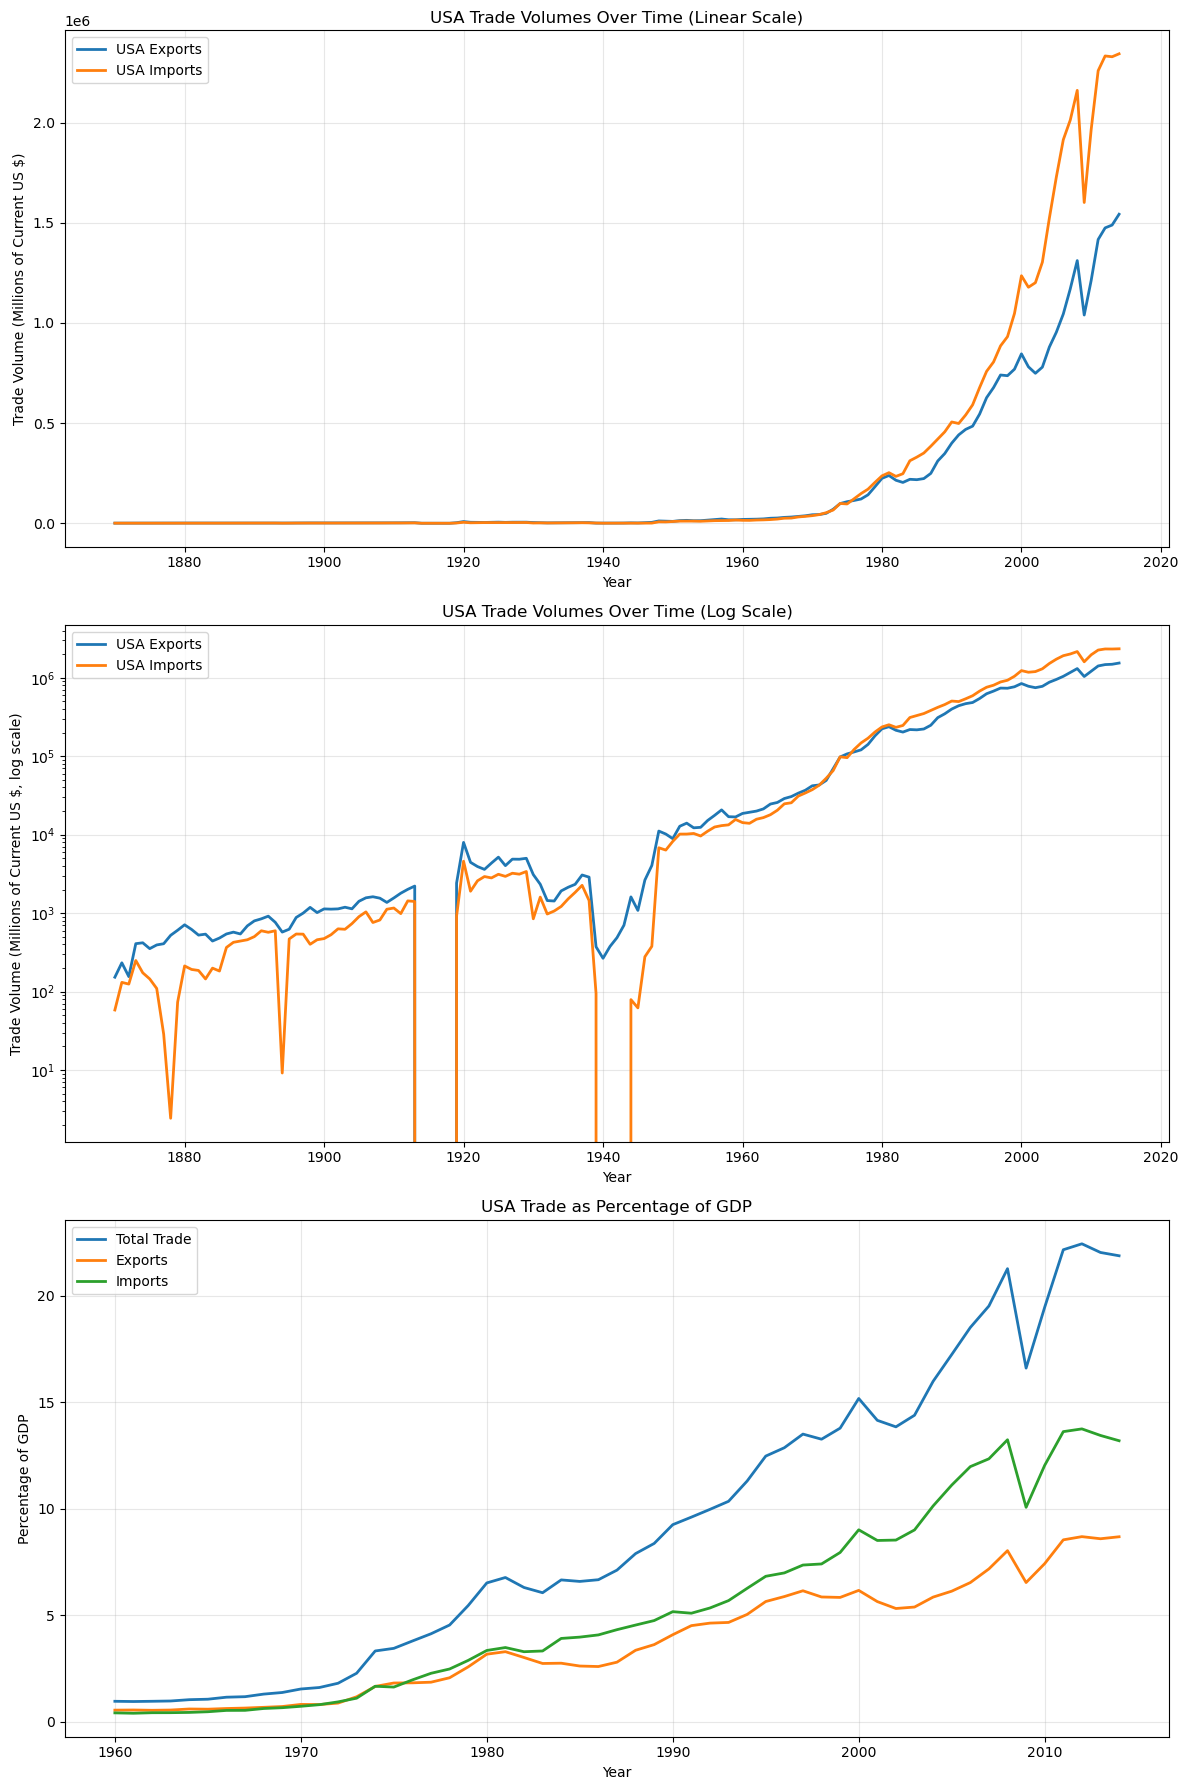

In [43]:

def plot_usa_trade_vs_gdp():
    # Get the trade data
    usa_imports_as_ccode1 = df[df['ccode1'] == 2].groupby('year')['flow1'].sum()
    usa_imports_as_ccode2 = df[df['ccode2'] == 2].groupby('year')['flow2'].sum()
    usa_total_imports = usa_imports_as_ccode1.add(usa_imports_as_ccode2, fill_value=0)

    usa_exports_as_ccode1 = df[df['ccode1'] == 2].groupby('year')['flow2'].sum()
    usa_exports_as_ccode2 = df[df['ccode2'] == 2].groupby('year')['flow1'].sum()
    usa_total_exports = usa_exports_as_ccode1.add(usa_exports_as_ccode2, fill_value=0)

    # Get GDP data
    try:
        gdp_data = load_and_process_gdp()
        has_gdp = True
    except:
        print("Could not fetch GDP data. Plotting trade data only.")
        has_gdp = False

    # Create plots
    if has_gdp:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
    else:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Plot 1: Trade volumes (linear scale)
    ax1.plot(usa_total_exports.index, usa_total_exports.values, 
            label='USA Exports', linewidth=2)
    ax1.plot(usa_total_imports.index, usa_total_imports.values, 
            label='USA Imports', linewidth=2)
    ax1.set_title('USA Trade Volumes Over Time (Linear Scale)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Trade Volume (Millions of Current US $)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Plot 2: Trade volumes (log scale)
    ax2.plot(usa_total_exports.index, usa_total_exports.values, 
            label='USA Exports', linewidth=2)
    ax2.plot(usa_total_imports.index, usa_total_imports.values, 
            label='USA Imports', linewidth=2)
    ax2.set_yscale('log')
    ax2.set_title('USA Trade Volumes Over Time (Log Scale)')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Trade Volume (Millions of Current US $, log scale)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    if has_gdp:
        # Plot 3: Trade as percentage of GDP
        common_years = usa_total_exports.index.intersection(gdp_data.index)
        total_trade = (usa_total_exports + usa_total_imports)[common_years]
        gdp_aligned = gdp_data[common_years]
        trade_gdp_ratio = (total_trade / gdp_aligned) * 100

        ax3.plot(trade_gdp_ratio.index, trade_gdp_ratio.values, 
                label='Total Trade', linewidth=2)
        ax3.plot(common_years, 
                (usa_total_exports[common_years] / gdp_aligned) * 100,
                label='Exports', linewidth=2)
        ax3.plot(common_years, 
                (usa_total_imports[common_years] / gdp_aligned) * 100,
                label='Imports', linewidth=2)
        ax3.set_title('USA Trade as Percentage of GDP')
        ax3.set_xlabel('Year')
        ax3.set_ylabel('Percentage of GDP')
        ax3.grid(True, alpha=0.3)
        ax3.legend()

        # Print statistics for the latest common year
        latest_year = common_years[-1]
        print(f"\nStatistics for {latest_year}:")
        print(f"GDP: ${gdp_aligned[latest_year]:,.2f} million")
        print(f"Total Trade: ${total_trade[latest_year]:,.2f} million")
        print(f"Trade as % of GDP: {trade_gdp_ratio[latest_year]:.2f}%")
        print(f"Exports as % of GDP: {(usa_total_exports[latest_year]/gdp_aligned[latest_year]*100):.2f}%")
        print(f"Imports as % of GDP: {(usa_total_imports[latest_year]/gdp_aligned[latest_year]*100):.2f}%")

    plt.tight_layout()
    plt.show()

# First install required package if not already installed
# !pip install wbdata

# Run the analysis
plot_usa_trade_vs_gdp()